# Gumbel distribution

The Gumbel distribution somehow magically describes the distribution of the maximum values drawn from a set of Normal distributions. Not only that. Just replace the Normal distributions with Exponential distributions and the maxima again form a Gumbel distribution. Magic indeed!

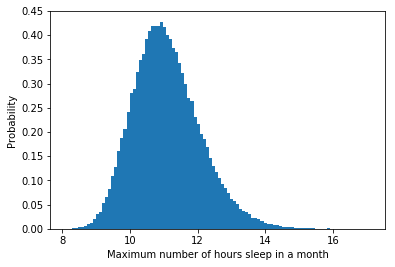

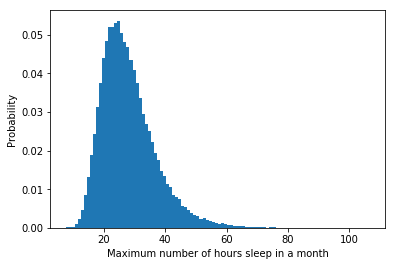

In [30]:
# Suppose we sleep on average 6 hours...
import numpy as np
from matplotlib.pyplot import *

hours_of_sleep_per_night = 7
variance = 2
average_days_per_month = 30
# over a lifetime, we live a 100 years..., but to get a smoother curve, assume 10000 years
number_of_months = 12*10000
samples = np.random.normal(loc=hours_of_sleep_per_night, scale=variance, size=(number_of_months, average_days_per_month))
extremes = np.max(samples, axis=1)

def plot_distribution(values):
    probs, sleeps, _ = hist(values, normed=True, bins=100)
    xlabel("Maximum number of hours sleep in a month")
    ylabel("Probability")
    

figure()
plot_distribution(extremes)

# It is not so logically to represent the number of hours sleep per night by an exponential distribution...
# However, it is possible for a couch potato perhaps to sleep at times 60 hours straight?
samples = np.random.exponential(scale=hours_of_sleep_per_night, size=(number_of_months, average_days_per_month))
extremes = np.max(samples, axis=1)

figure()
plot_distribution(extremes)


The Gumbel is one of a class of extreme value distributions, the Generalized Extreme Value (GEV) distributions. This also includes the Weibull and Frechet distributions.

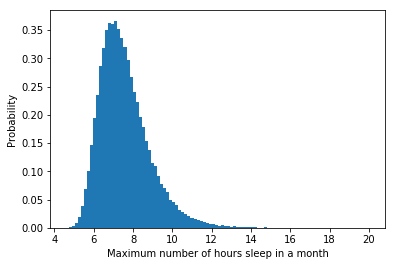

In [31]:
scale=1
samples = np.random.gumbel(loc=hours_of_sleep_per_night, scale=scale, size=number_of_months)
figure()
plot_distribution(samples)


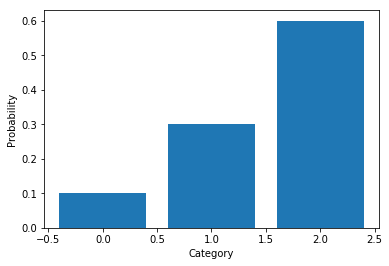

In [275]:
#n_cats = 7
#cats = np.arange(n_cats)

#probs = np.random.randint(low=1, high=20, size=n_cats)
#probs = probs / sum(probs)
n_cats = 3
cats = np.arange(n_cats)
probs = [0.1, 0.3, 0.6]
logits = np.log(probs)

def plot_probs():
    bar(cats, probs)
    xlabel("Category")
    ylabel("Probability")
    
figure()
plot_probs()

Test:  1.2189170557355544
Logits
[-2.30258509 -1.2039728  -0.51082562]

Original probabilities:		0.100 0.300 0.600
Estimated probabilities:	0.134 0.265 0.601


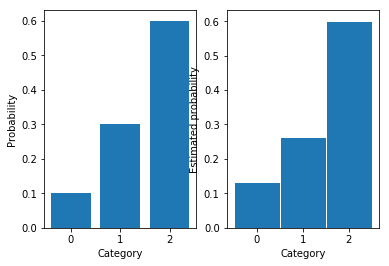

In [280]:
n_samples = 100000
#samples = np.random.choice(cats, p=probs, size=n_samples)
def plot_estimated_probs(samples):
    n_cats = np.max(samples) + 1
    estd_probs, _, _ = hist(samples,
                            bins=np.arange(n_cats + 1),
                            align='left',
                            edgecolor='white',
                            normed=True)
    xlabel("Category")
    ylabel("Estimated probability")
    return estd_probs

def print_probs(probs):
    print(" ".join(["{:.3f}"] * len(probs)).format(*probs))

test = pow(pow(1.894427,1/3)*pow(1.836660,1/3)*pow(1.707107,1/3),1/3)
print("Test: ", test)

def sample(values):
    #noise = np.random.gumbel(scale=1, size=len(logits))
    #noise = 1.6632456*np.random.uniform(size=len(values)) # in case of 0.2 vs 0.8
    noise = 1.4*np.random.uniform(size=len(values))
    sample = np.argmax(values + noise)
    return sample

def print_gumbel(values):
    samples = np.random.gumbel(scale=1, size=len(logits))
    print(np.exp(samples))
    
#values = logits
values = probs
samples = [sample(values) for _ in range(n_samples)]

print("Logits")
print(np.log(probs))
print()

figure()
subplot(1, 2, 1)
plot_probs()
subplot(1, 2, 2)
estd_probs = plot_estimated_probs(samples)

print("Original probabilities:\t\t", end="")
print_probs(probs)
print("Estimated probabilities:\t", end="")
print_probs(estd_probs)

In [264]:
N=1000000
scale=1.2
desired_result = 0.1
print("Desired result: %.2f" % desired_result)
neighbour=0.6
distance = neighbour - desired_result
print("Distance: %.2f" % distance)
samples = scale*np.random.uniform(size=(2,N))
x=samples[0,:]
y=samples[1,:]
diffs = x-y
s=sum(diffs>distance)
result=s/N
print("Sampled result: %.4f" % result)

pred_result=1/2*(scale-distance)*(scale-distance)/scale**2
print("Predicted result: %.4f" % pred_result)

a=distance
if (a != 0):
    pred_scale = 1+sqrt(4*a**2-4*a**3)/(2*a)
else:
    pred_scale = 1

print("Perfect scale for this distance: %.6f" % pred_scale)

Desired result: 0.10
Distance: 0.50
Sampled result: 0.1696
Predicted result: 0.1701
Perfect scale for this distance: 1.707107
